**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('./Bank Customer Churn Dataset/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
print(df['country'].value_counts())
print(df['country'].unique())

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
['France' 'Spain' 'Germany']


In [45]:
grouped_data = df.groupby('gender').apply(lambda x: x.reset_index(drop=True) )
grouped_data


credit_score  country  gender  age  tenure    balance  \
gender                                                               
0      0              619        1       0   42       2       0.00   
       1              608        2       0   41       1   83807.86   
       2              502        1       0   42       8  159660.80   
       3              699        1       0   39       1       0.00   
       4              850        2       0   43       2  125510.82   
...                   ...      ...     ...  ...     ...        ...   
1      5452           726        2       1   36       2       0.00   
       5453           644        1       1   28       7  155060.41   
       5454           771        1       1   39       5       0.00   
       5455           516        1       1   35      10   57369.61   
       5456           772        3       1   42       3   75075.31   

             products_number  credit_card  active_member  estimated_salary  \
gender                                                                       
0      0                   1            1              1         101348.88   
       1                   1            0              1         112542.58   
       2                   3            1              0         113931.57   
       3                   2            0              0          93826.63   
       4                   1            1              1          79084.10   
...                      ...          ...            ...               ...   
1      5452                1            1              0         195192.40   
       5453                1            1              0          29179.52   
       5454                2            1              0          96270.64   
       5455                1            1              1         101699.77   
       5456                2            1              0          92888.52   

             churn  
gender              
0      0         1  
       1         0  
       2         1  
       3         0  
       4         0  
...            ...  
1      5452      0  
       5453      0  
       5454      0  
       5455      0  
       5456      1  

[10000 rows x 11 columns]

In [10]:
# dropping the id
df = df.drop(['customer_id'], axis=1)

# EDA

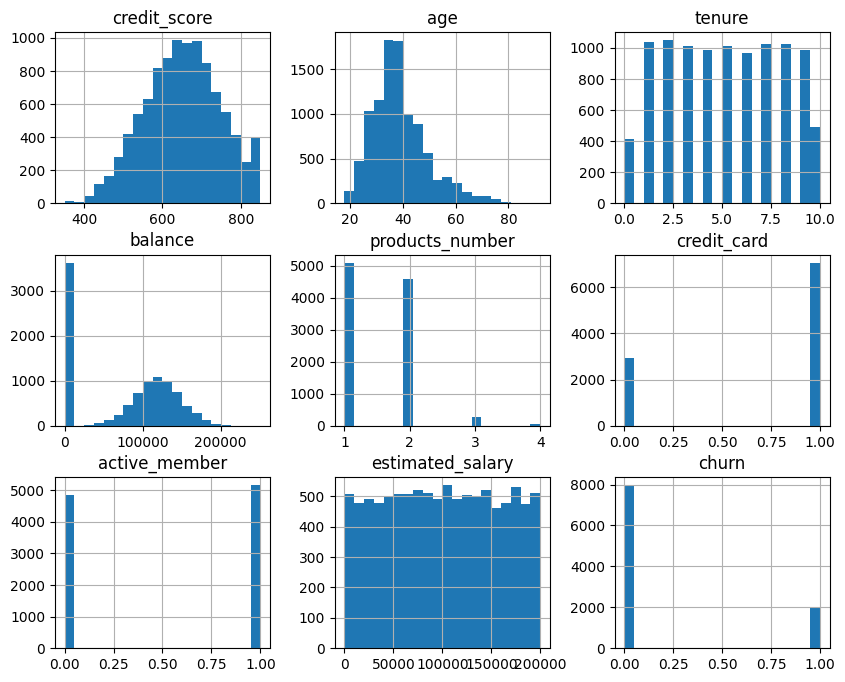

In [11]:
df.hist(figsize=(10,8),bins=20)
plt.show()

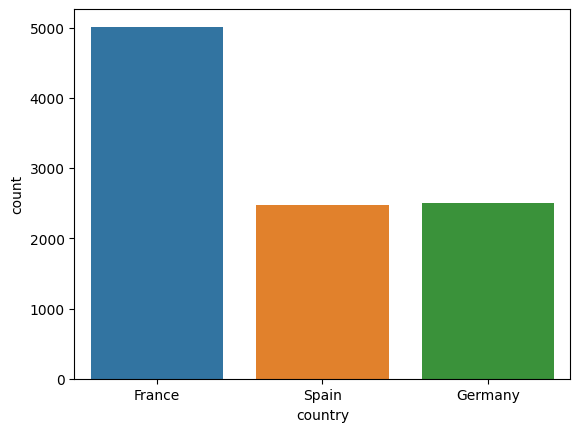

In [12]:
sns.countplot(x='country', data=df,)
plt.show()

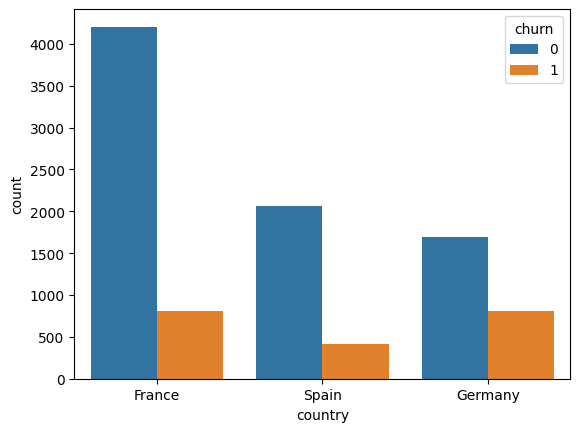

In [13]:
sns.countplot(x='country', data=df, hue="churn")
plt.show()

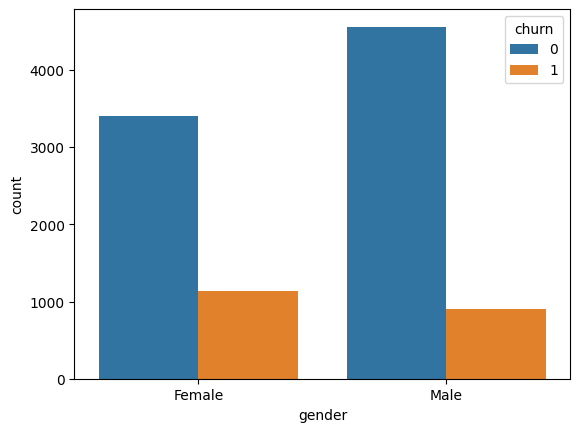

In [14]:
sns.countplot(x='gender', data=df, hue="churn")
plt.show()

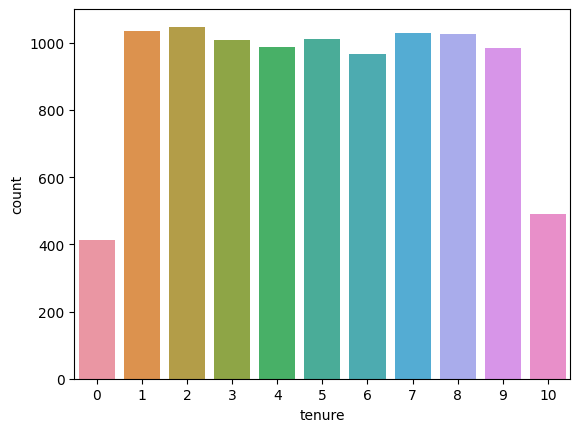

In [15]:
sns.countplot(x='tenure', data=df)
plt.show()

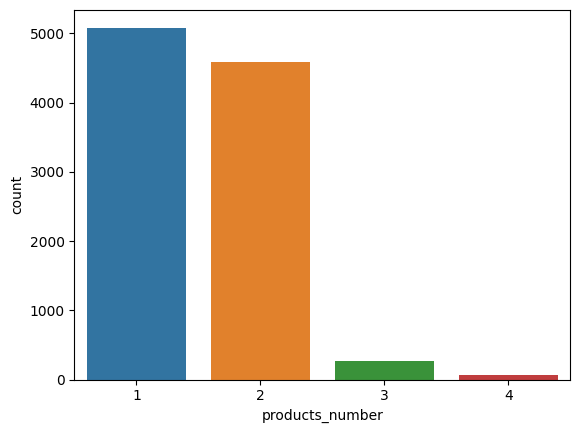

In [16]:
sns.countplot(x='products_number', data=df)
plt.show()

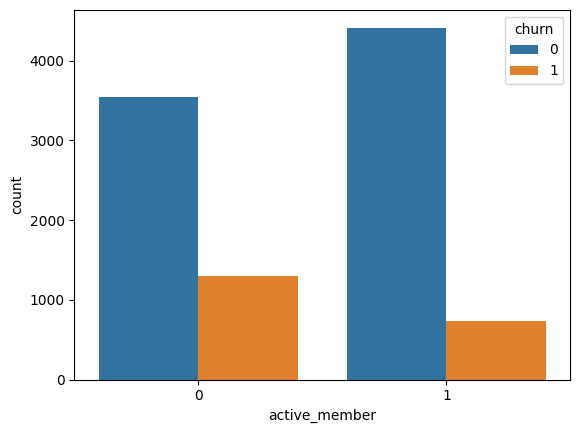

In [17]:
sns.countplot(x='active_member', data=df, hue="churn")
plt.show()

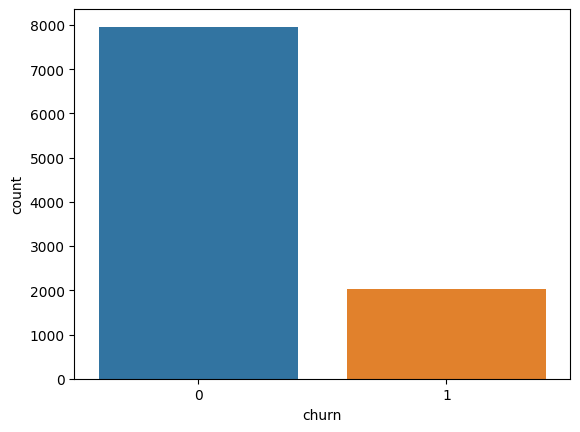

In [18]:
sns.countplot(x='churn', data=df, )
plt.show()

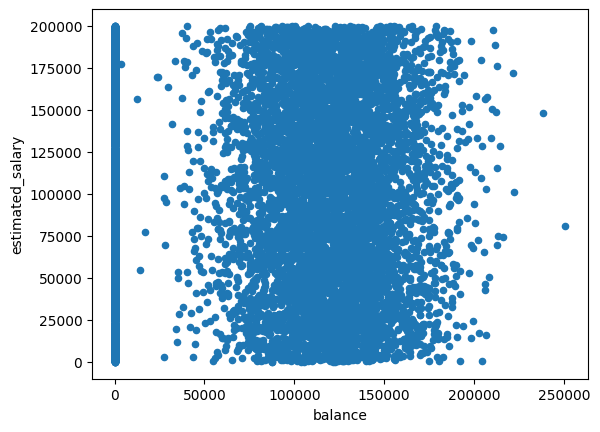

In [19]:
x = 'balance'
y= 'estimated_salary'

df.plot(x=x, y=y, kind='scatter')
plt.show()


In [20]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: ylabel='Frequency'>

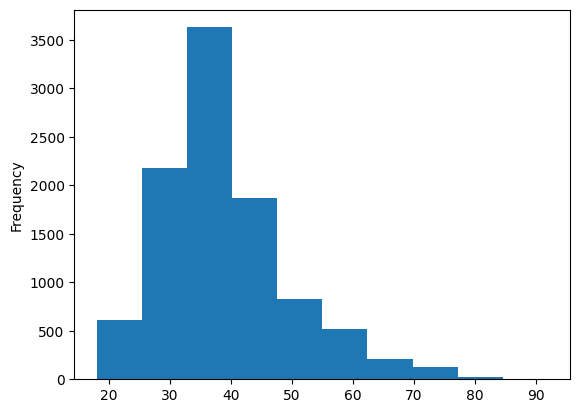

In [21]:
df['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

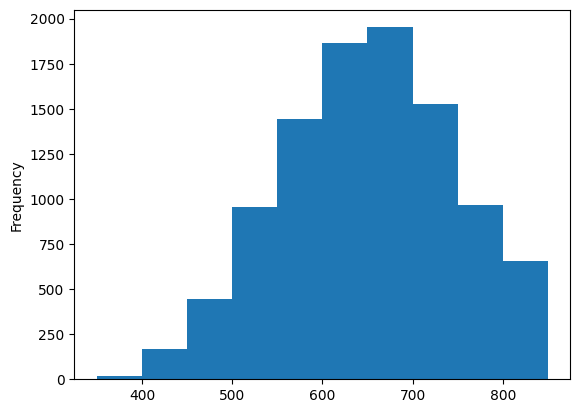

In [22]:
df['credit_score'] \
.plot(kind='hist')

# Preprocessing

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


convert categorical values to numerical

In [24]:
df = df.replace({'country': {'France': 1, 'Spain': 2, 'Germany': 3}})

In [25]:
df = df.replace({'gender': {'Female': 0, 'Male': 1,}})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


rebalance the dataset

In [27]:
from sklearn.utils import resample

In [28]:
df_majority = df[(df['churn'] == 0)]
df_minority = df[(df['churn'] == 1)]

dndersampled_majority = resample(df_majority,
                                 replace=False,  # Set to False for undersampling
                                 n_samples=len(df_minority),  # Match minority class size
                                 random_state=42)

df_balanced = pd.concat([dndersampled_majority, df_minority])

In [29]:
df_balanced['churn'].value_counts()

churn
0    2037
1    2037
Name: count, dtype: int64

In [30]:
df_balanced

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
8165,606,2,1,37,8,154712.58,2,1,0,89099.18,0
6409,683,1,0,33,9,0.00,2,1,1,38784.42,0
2157,744,1,0,44,3,0.00,2,1,1,189016.14,0
1618,697,1,1,27,8,141223.68,2,1,0,90591.15,0
1633,562,1,1,35,7,0.00,1,0,0,48869.67,0
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,3,1,42,3,152039.70,1,1,1,53445.17,1
9982,655,3,0,46,7,137145.12,1,1,0,115146.40,1
9991,597,1,0,53,4,88381.21,1,1,0,69384.71,1
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1


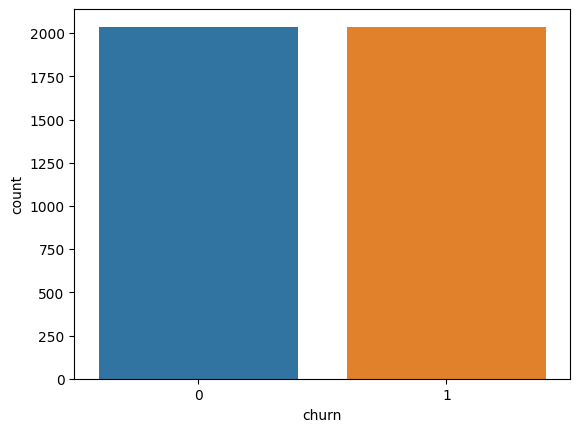

In [31]:
sns.countplot(x='churn', data=df_balanced, )
plt.show()

<Axes: xlabel='gender', ylabel='age'>

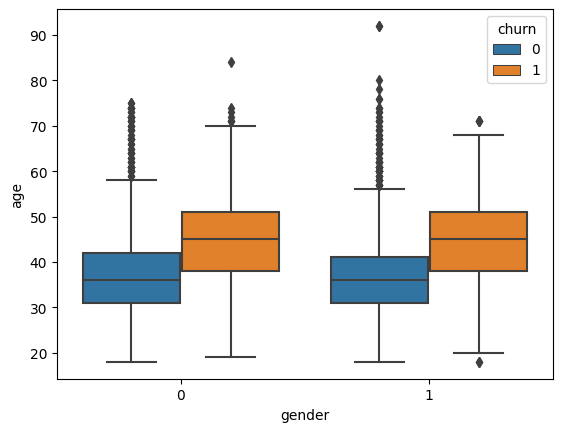

In [36]:
# figure out the outliers
sns.boxplot(data=df_balanced, x='gender', y='age', hue='churn')

In [40]:
len((df_balanced[df_balanced['age'] > 60]) )

209

<Axes: xlabel='gender', ylabel='age'>

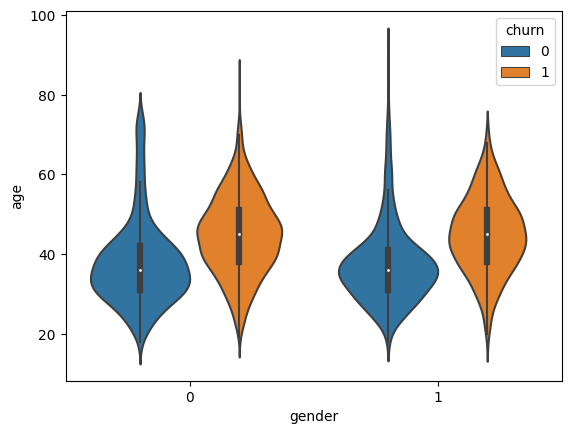

In [37]:
sns.violinplot(data=df_balanced, x='gender', y='age', hue='churn')

<Axes: xlabel='credit_score'>

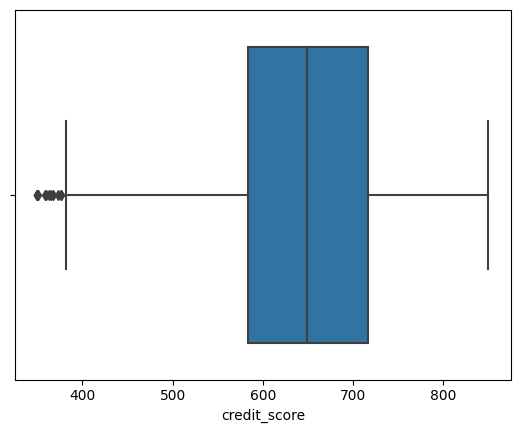

In [44]:
sns.boxplot(data=df_balanced, x='credit_score')

# Modeling

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score,classification_report

from sklearn.model_selection import train_test_split

In [48]:
x = df_balanced.drop('churn', axis=1)
y = df_balanced['churn']

In [51]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [62]:
# Logistic Regression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

class_report = classification_report(y_test, y_pred)

print(class_report)


              precision    recall  f1-score   support

           0       0.69      0.64      0.66       619
           1       0.65      0.70      0.68       604

    accuracy                           0.67      1223
   macro avg       0.67      0.67      0.67      1223
weighted avg       0.67      0.67      0.67      1223



In [63]:
# Decision Trees

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       619
           1       0.69      0.70      0.69       604

    accuracy                           0.69      1223
   macro avg       0.69      0.69      0.69      1223
weighted avg       0.69      0.69      0.69      1223



In [64]:
# Random Forest

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       619
           1       0.77      0.76      0.76       604

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



In [65]:
# Support Victor Machine

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.63      0.40      0.49       619
           1       0.55      0.76      0.64       604

    accuracy                           0.58      1223
   macro avg       0.59      0.58      0.56      1223
weighted avg       0.59      0.58      0.56      1223



In [66]:
# XGboost

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       619
           1       0.76      0.75      0.75       604

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



# Summary of the model's evaluation

In [54]:
classifiers = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    XGBClassifier()
]

In [55]:
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost']

vlaues = []

for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    result = clf.predict(x_test)
    score = clf.score(x_test, y_test)
    vlaues.append(score)
    
    

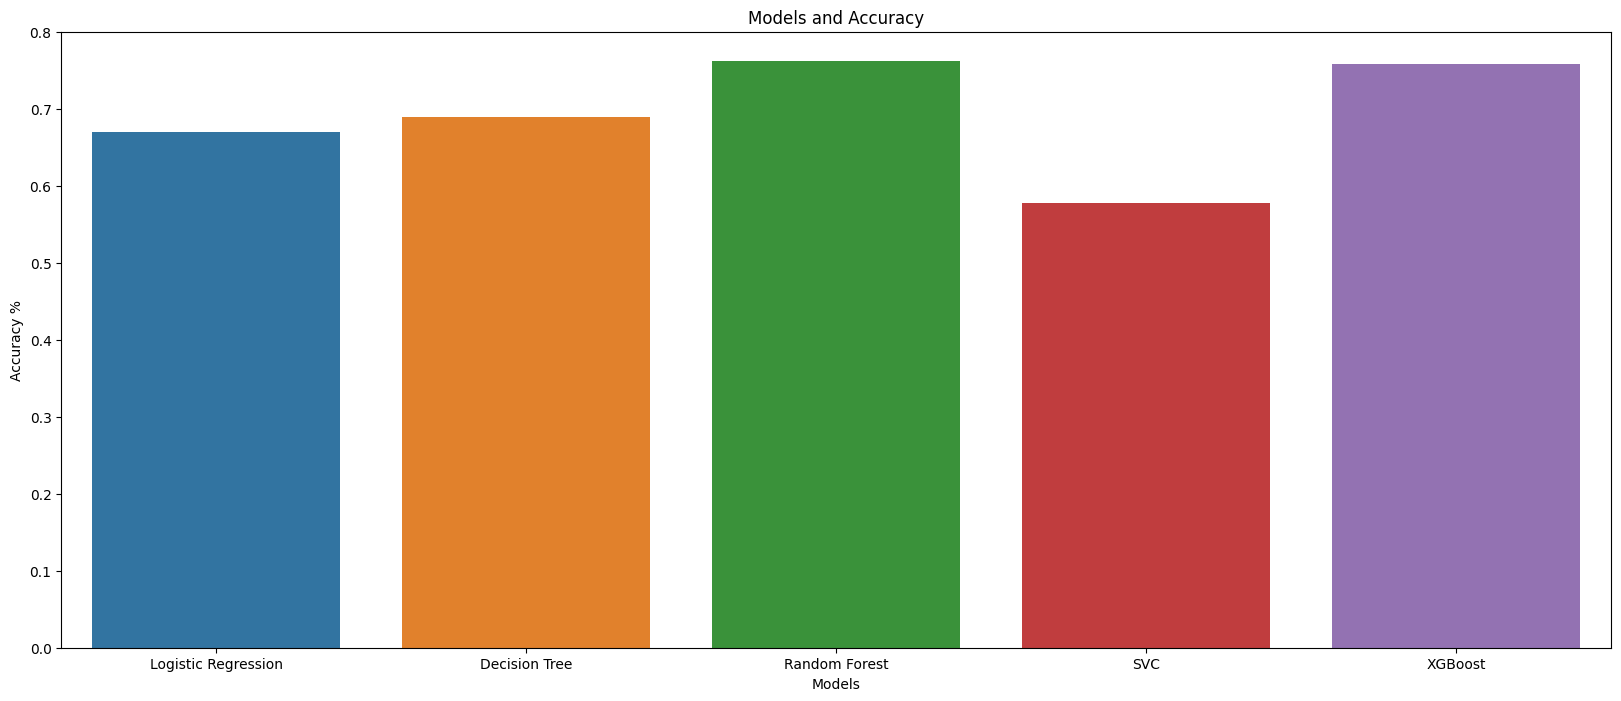

In [67]:
plt.figure(figsize=(20,8))
sns.barplot(x=names,y=vlaues)
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Models and Accuracy')
plt.show()